# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [1]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 52kB/s 
     |████████████████████████████████| 450kB 58.9MB/s 
     |████████████████████████████████| 3.8MB 64.9MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


## Get Required Files from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#Set your project path 
import os
project_path =  "/content/drive/My Drive/AIML/NLP/"
os.chdir(project_path)

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 8 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [0]:
import pandas as pd

In [5]:
df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


## Drop `article_link` from dataset. ( 4 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [6]:
df = df.drop(['article_link'], axis=1)
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


## Get the Length of each line and find the maximum length. ( 8 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [7]:
df['length'] = df['headline'].apply(lambda x: len(x.split(" ")))
df.head()

,is_sarcastic,headline,length
0,1,thirtysomething scientists unveil doomsday clo...,8
1,0,dem rep. totally nails why congress is falling...,13
2,0,eat your veggies: 9 deliciously different recipes,7
3,1,inclement weather prevents liar from getting t...,8
4,1,mother comes pretty close to using word 'strea...,9


In [8]:
print(f"Maximun line length {max(df['length'])}")

Maximun line length 151


#**## Modelling**

## Import required modules required for modelling.

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

## Set Different Parameters for the model. ( 4 marks)

In [0]:
max_features = 10000
maxlen = max(df['length'])
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 8 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [0]:
import re
df['headline'] = df['headline'].apply(lambda s : re.sub('[^a-zA-Z]', ' ', s))

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['headline'])

## Define X and y for your model

In [15]:
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 28619
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0  352 3155 6257 2143    2  641 1123]
Number of Labels:  28619
1


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20033, 151), (20033,), (8586, 151), (8586,))

## Get the Vocabulary size ( 4 marks)
Hint : You can use tokenizer.word_index.

In [17]:
word_index = tokenizer.word_index
vocab_size = max(list(word_index.values())) + 1
print('vocab_size %s.' % vocab_size)

vocab_size 25916.


In [0]:
dict1 = dict()
for word, idx in tokenizer.word_index.items():
  dict1[word] = idx

In [19]:
dict1

{'to': 1,
 'of': 2,
 's': 3,
 'the': 4,
 'in': 5,
 'for': 6,
 'a': 7,
 'on': 8,
 'and': 9,
 'with': 10,
 'trump': 11,
 'is': 12,
 'new': 13,
 'man': 14,
 'at': 15,
 'from': 16,
 't': 17,
 'you': 18,
 'it': 19,
 'about': 20,
 'by': 21,
 'after': 22,
 'this': 23,
 'out': 24,
 'that': 25,
 'up': 26,
 'he': 27,
 'be': 28,
 'as': 29,
 'how': 30,
 'not': 31,
 'what': 32,
 'can': 33,
 'who': 34,
 'his': 35,
 'are': 36,
 'just': 37,
 'your': 38,
 'all': 39,
 'has': 40,
 'will': 41,
 'report': 42,
 'more': 43,
 'into': 44,
 'one': 45,
 'year': 46,
 'have': 47,
 'woman': 48,
 'over': 49,
 'i': 50,
 'day': 51,
 'why': 52,
 'u': 53,
 'area': 54,
 'time': 55,
 'says': 56,
 'donald': 57,
 'first': 58,
 'no': 59,
 'like': 60,
 'get': 61,
 'her': 62,
 'people': 63,
 'obama': 64,
 'old': 65,
 'off': 66,
 'women': 67,
 'nation': 68,
 'life': 69,
 'world': 70,
 'they': 71,
 'now': 72,
 'house': 73,
 'an': 74,
 'we': 75,
 'white': 76,
 'still': 77,
 'back': 78,
 'make': 79,
 'was': 80,
 'than': 81,
 'down

In [0]:
num_words = max(list(word_index.values())) + 1

#**## Word Embedding**

## Get Glove Word Embeddings

In [0]:
glove_file = project_path + "glove.6B.zip"

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [0]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

In [23]:
len(embeddings)

400000

# Create a weight matrix for words in training docs

In [24]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

In [25]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57345998,  0.54170001, -0.23477   , ...,  0.54417998,
        -0.23069   ,  0.34946999],
       [ 0.052924  ,  0.25426999,  0.31353   , ..., -0.086254  ,
        -0.41916999,  0.46496001],
       ...,
       [ 0.56370002,  0.42438   ,  1.21969998, ..., -0.15029   ,
        -0.08155   , -0.1043    ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53964001, -0.53973001, -0.41780999, ...,  0.23913001,
         0.51385999,  0.42449999]])

## Create and Compile your Model  ( 14 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


## Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 10 marks)


In [27]:
model1 = Sequential()
model1.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model1.add(Bidirectional(LSTM(128, return_sequences = True)))
model1.add(GlobalMaxPool1D())
#model1.add(Flatten())
model1.add(Dense(64, activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation="sigmoid"))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 200)         5183200   
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 256)         336896    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)               

In [29]:
batch_size = 100
epochs = 5

history = model1.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 16026 samples, validate on 4007 samples
Epoch 1/5
16026/16026 [==============================] - 195s 12ms/sample - loss: 0.5495 - accuracy: 0.7117 - val_loss: 0.3851 - val_accuracy: 0.8293
Epoch 2/5
16026/16026 [==============================] - 195s 12ms/sample - loss: 0.3341 - accuracy: 0.8695 - val_loss: 0.3472 - val_accuracy: 0.8540
Epoch 3/5
16026/16026 [==============================] - 198s 12ms/sample - loss: 0.2247 - accuracy: 0.9205 - val_loss: 0.3368 - val_accuracy: 0.8555
Epoch 4/5
16026/16026 [==============================] - 199s 12ms/sample - loss: 0.1481 - accuracy: 0.9500 - val_loss: 0.3789 - val_accuracy: 0.8508
Epoch 5/5
16026/16026 [==============================] - 199s 12ms/sample - loss: 0.0929 - accuracy: 0.9704 - val_loss: 0.5190 - val_accuracy: 0.8510


In [30]:
print(model1.evaluate(X_test, y_test))
print(model1.metrics_names)

8586/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
import matplotlib.pyplot as plt

def plot(history):
    hist = history.history
    train_loss, train_acc = hist['loss'], hist['accuracy']
    val_loss, val_acc = hist['val_loss'], hist['val_accuracy']
    epochs = range(1, len(train_acc)+1)
    
    plt.plot(epochs, train_acc, 'g', label='Training acc')
    plt.plot(epochs, val_acc, 'o', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, train_loss, 'g', label='Training loss')
    plt.plot(epochs, val_loss, 'o', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

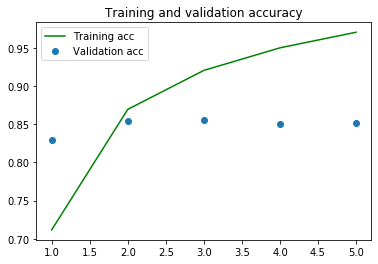

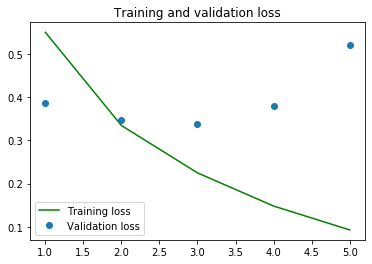

In [32]:
plot(history)

In [52]:
sentence = ["wednesday's morning email: what you missed last night in trump's state of the union"]
#sentence = ["this is what it's really like out there for female superheroes"]
sentence_sequence = tokenizer.texts_to_sequences(sentence)
sentence_padding = pad_sequences(sentence_sequence, maxlen=maxlen)
prediction=model1.predict_classes(sentence_padding)
predict=np.max(prediction)
print(model1.predict(sentence_padding))
print(len(prediction))
print(predict)
if predict==1:
    print("real")
elif predict==0:
    print("fake")

[[0.03986823]]
1
0
fake
